In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
# Directory containing the dataset files
dataset_dir = "TrafficLabelling/"

# List of CIC-IDS2017 files from the screenshot
files = [
    "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",
    "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "Monday-WorkingHours.pcap_ISCX.csv",
    "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "Tuesday-WorkingHours.pcap_ISCX.csv",
    "Wednesday-workingHours.pcap_ISCX.csv"
]

# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Load and combine each file
for file in files:
    file_path = os.path.join(dataset_dir, file)
    if os.path.exists(file_path):
        try:
            # Try latin-1 encoding first
            df = pd.read_csv(file_path, encoding='latin-1')
            print(f"File {file} loaded successfully with latin-1 encoding!")
        except UnicodeDecodeError:
            try:
                # If latin-1 fails, try windows-1252
                df = pd.read_csv(file_path, encoding='windows-1252')
                print(f"File {file} loaded successfully with windows-1252 encoding!")
            except UnicodeDecodeError:
                # If that fails, try iso-8859-1
                df = pd.read_csv(file_path, encoding='iso-8859-1')
                print(f"File {file} loaded successfully with iso-8859-1 encoding!")
            except Exception as e:
                print(f"Failed to load file {file}: {e}")
                continue
        except Exception as e:
            print(f"Failed to load file {file}: {e}")
            continue
        
        # Strip whitespace from column names
        df.columns = df.columns.str.strip()
        
        # Drop rows where all columns are NaN
        print(f"\nInitial number of rows in {file}: {len(df)}")
        df = df.dropna(how='all')
        print(f"Number of rows after dropping empty rows in {file}: {len(df)}")
        
        # Append to combined DataFrame
        combined_df = pd.concat([combined_df, df], ignore_index=True)
        print(f"Added {len(df)} rows from {file}. Total rows in combined dataset: {len(combined_df)}")
    else:
        print(f"File {file} not found.")

# Reset index and display summary
combined_df = combined_df.reset_index(drop=True)
print(f"\nTotal rows in combined dataset: {len(combined_df)}")
print("Columns:", combined_df.columns.tolist())
combined_df.head()


File Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv loaded successfully with latin-1 encoding!

Initial number of rows in Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv: 225745
Number of rows after dropping empty rows in Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv: 225745
Added 225745 rows from Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv. Total rows in combined dataset: 225745
File Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv loaded successfully with latin-1 encoding!

Initial number of rows in Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv: 286467
Number of rows after dropping empty rows in Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv: 286467
Added 286467 rows from Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv. Total rows in combined dataset: 512212
File Friday-WorkingHours-Morning.pcap_ISCX.csv loaded successfully with latin-1 encoding!

Initial number of rows in Friday-WorkingHours-Morning.pcap_ISCX.csv: 191033
Number of rows after dropping

C:\Users\soka1\AppData\Local\Temp\ipykernel_137196\2591159765.py:25: DtypeWarning: Columns (0,1,3,6,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin-1')


File Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv loaded successfully with latin-1 encoding!

Initial number of rows in Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv: 458968
Number of rows after dropping empty rows in Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv: 170366
Added 170366 rows from Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv. Total rows in combined dataset: 1692131
File Tuesday-WorkingHours.pcap_ISCX.csv loaded successfully with latin-1 encoding!

Initial number of rows in Tuesday-WorkingHours.pcap_ISCX.csv: 445909
Number of rows after dropping empty rows in Tuesday-WorkingHours.pcap_ISCX.csv: 445909
Added 445909 rows from Tuesday-WorkingHours.pcap_ISCX.csv. Total rows in combined dataset: 2138040
File Wednesday-workingHours.pcap_ISCX.csv loaded successfully with latin-1 encoding!

Initial number of rows in Wednesday-workingHours.pcap_ISCX.csv: 692703
Number of rows after dropping empty rows in Wednesday-workingHours.pcap_ISCX.csv: 692

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443.0,192.168.10.5,54865.0,6.0,7/7/2017 3:30,3.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80.0,192.168.10.5,55054.0,6.0,7/7/2017 3:30,109.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80.0,192.168.10.5,55055.0,6.0,7/7/2017 3:30,52.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443.0,192.168.10.16,46236.0,6.0,7/7/2017 3:30,34.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443.0,192.168.10.5,54863.0,6.0,7/7/2017 3:30,3.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


Data Validation (Can skip)

In [7]:
# Step 1.5: Validate and Inspect the Combined Dataset
# 1. Check for NaN values
print("\nChecking for NaN values in each column:")
nan_counts = combined_df.isna().sum()
print(nan_counts)
print("\nPercentage of NaN values in each column:")
nan_percentage = (combined_df.isna().sum() / len(combined_df)) * 100
print(nan_percentage)

# 2. Check data types
print("\nData types of each column:")
print(combined_df.dtypes)
print("\nColumns with potential mixed types (based on DtypeWarning):")
mixed_type_columns = ['Flow ID', 'Source IP', 'Destination IP', 'Protocol', 'Label']
for col in mixed_type_columns:
    print(f"\nUnique value types in '{col}':")
    print(combined_df[col].apply(type).value_counts())

# 3. Check unique values in 'Label'
print("\nUnique values in 'Label' column and their counts:")
label_counts = combined_df['Label'].value_counts()
print(label_counts)
print("\nPercentage distribution of labels:")
label_percentage = (combined_df['Label'].value_counts(normalize=True)) * 100
print(label_percentage)

# 4. Check for infinite values
print("\nChecking for infinite values in numeric columns:")
inf_columns = combined_df.select_dtypes(include=[np.number]).columns
for col in inf_columns:
    inf_count = combined_df[col].isin([np.inf, -np.inf]).sum()
    if inf_count > 0:
        print(f"Column '{col}' contains {inf_count} infinite values")

# 5. Check for outliers and unexpected values
print("\nSummary statistics for numeric columns:")
print(combined_df.select_dtypes(include=[np.number]).describe())
print("\nUnique values in 'Protocol' column:")
print(combined_df['Protocol'].unique())
print("\nChecking for negative values in columns where they should be non-negative:")
columns_to_check = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward']
for col in columns_to_check:
    if (combined_df[col] < 0).any():
        print(f"Column '{col}' contains {(combined_df[col] < 0).sum()} negative values")

# 6. Check for duplicate rows
print("\nNumber of duplicate rows:")
duplicate_rows = combined_df.duplicated().sum()
print(duplicate_rows)
print("\nPercentage of duplicate rows:")
duplicate_percentage = (duplicate_rows / len(combined_df)) * 100
print(f"{duplicate_percentage:.2f}%")

# 7. Check for feature consistency
print("\nChecking for inconsistent data types within columns:")
for col in combined_df.columns:
    type_counts = combined_df[col].apply(type).value_counts()
    if len(type_counts) > 1:
        print(f"Column '{col}' has multiple data types:")
        print(type_counts)


Checking for NaN values in each column:
Flow ID             0
Source IP           0
Source Port         0
Destination IP      0
Destination Port    0
                   ..
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
Label               0
Length: 85, dtype: int64

Percentage of NaN values in each column:
Flow ID             0.0
Source IP           0.0
Source Port         0.0
Destination IP      0.0
Destination Port    0.0
                   ... 
Idle Mean           0.0
Idle Std            0.0
Idle Max            0.0
Idle Min            0.0
Label               0.0
Length: 85, dtype: float64

Data types of each column:
Flow ID              object
Source IP            object
Source Port         float64
Destination IP       object
Destination Port    float64
                     ...   
Idle Mean           float64
Idle Std            float64
Idle Max            float64
Idle Min            float64
Label                object
Length: 85, dtype: obje

In [11]:
# Function to convert IP address to a single integer
def ip_to_int(ip):
    try:
        octets = ip.split('.')
        return int(octets[0]) * 256**3 + int(octets[1]) * 256**2 + int(octets[2]) * 256 + int(octets[3])
    except:
        return 0  # Handle invalid IPs by returning 0

# Preprocessing steps
# Drop duplicates
combined_df = combined_df.drop_duplicates()
print(f"Number of rows after dropping duplicates: {len(combined_df)}")

# Drop 'Flow ID' and 'Timestamp' columns (non-numeric and not needed for modeling)
if 'Flow ID' in combined_df.columns:
    combined_df = combined_df.drop('Flow ID', axis=1)
if 'Timestamp' in combined_df.columns:
    combined_df = combined_df.drop('Timestamp', axis=1)

# Debug: Check unique values in 'Label' before mapping
print("\nUnique values in 'Label' before mapping:")
print(combined_df['Label'].value_counts())

# Clean the 'Label' column: strip whitespace and convert to uppercase
combined_df['Label'] = combined_df['Label'].str.strip().str.upper()

# Debug: Check unique values in 'Label' after cleaning
print("\nUnique values in 'Label' after cleaning:")
print(combined_df['Label'].value_counts())

# Convert labels to binary (0 for Benign, 1 for Attack)
combined_df['Label'] = combined_df['Label'].apply(
    lambda x: 1 if isinstance(x, str) and x != 'BENIGN' else 0
)

# Convert IP columns to integers
for col in ['Source IP', 'Destination IP']:
    if col in combined_df.columns:
        combined_df[col] = combined_df[col].apply(ip_to_int)

# Handle negative values
combined_df['Flow Duration'] = combined_df['Flow Duration'].clip(lower=0)
combined_df['Init_Win_bytes_forward'] = combined_df['Init_Win_bytes_forward'].clip(lower=0)
combined_df['Init_Win_bytes_backward'] = combined_df['Init_Win_bytes_backward'].clip(lower=0)

# Handle infinite and NaN values
combined_df.replace([np.inf, -np.inf], np.nan, inplace=True)
combined_df.fillna(combined_df.mean(numeric_only=True), inplace=True)

# Clip extremely large values to prevent overflow (only for numeric columns)
numeric_cols = combined_df.select_dtypes(include=[np.number]).columns
combined_df[numeric_cols] = combined_df[numeric_cols].clip(lower=-1e308, upper=1e308)

# Verify the preprocessing
print("\nLabel distribution after preprocessing:")
print(combined_df['Label'].value_counts())
print("\nChecking for NaN values after preprocessing:")
print(combined_df.isna().sum())
print("\nChecking for infinite values after preprocessing:")
inf_columns = combined_df.select_dtypes(include=[np.number]).columns
for col in inf_columns:
    inf_count = combined_df[col].isin([np.inf, -np.inf]).sum()
    if inf_count > 0:
        print(f"Column '{col}' contains {inf_count} infinite values")

Number of rows after dropping duplicates: 2830540

Unique values in 'Label' before mapping:
Label
BENIGN                        2272895
DoS Hulk                       231072
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack  Brute Force         1507
Web Attack  XSS                  652
Infiltration                       36
Web Attack  Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

Unique values in 'Label' after cleaning:
Label
BENIGN                        2272895
DOS HULK                       231072
PORTSCAN                       158930
DDOS                           128027
DOS GOLDENEYE                   10293
FTP-PATATOR                      7938
SSH-PATATOR                   

In [12]:
#In case we saved the pre-processing data above
saved_df = combined_df
print("\nLabel distribution in saved dataset:")
print(saved_df['Label'].value_counts())
print("\nChecking for NaN values in saved dataset:")
print(saved_df.isna().sum())


Label distribution in saved dataset:
Label
0    2272895
1     557645
Name: count, dtype: int64

Checking for NaN values in saved dataset:
Source IP           0
Source Port         0
Destination IP      0
Destination Port    0
Protocol            0
                   ..
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
Label               0
Length: 83, dtype: int64



Class distribution before SMOTE:
Label
0    0.80299
1    0.19701
Name: proportion, dtype: float64

Training set distribution after SMOTE:
Label
0    0.5
1    0.5
Name: proportion, dtype: float64

Test set distribution after SMOTE:
Label
0    0.5
1    0.5
Name: proportion, dtype: float64


c:\Users\soka1\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00    454579
      Attack       1.00      1.00      1.00    454579

    accuracy                           1.00    909158
   macro avg       1.00      1.00      1.00    909158
weighted avg       1.00      1.00      1.00    909158



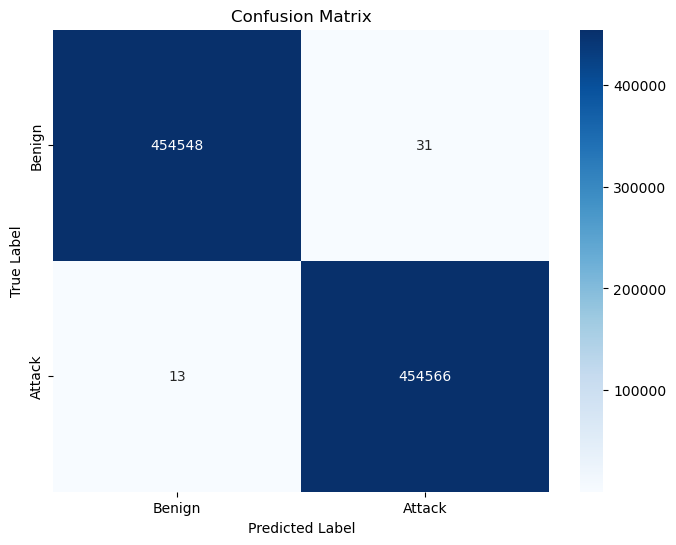

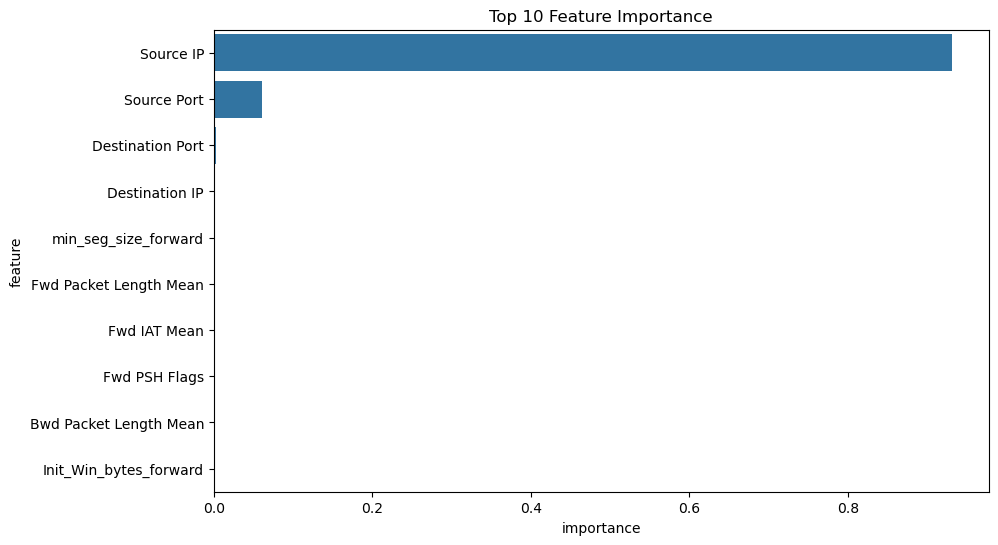

In [13]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Split the data
X = combined_df.drop('Label', axis=1)
y = combined_df['Label']

# Check class distribution before SMOTE
print("\nClass distribution before SMOTE:")
print(y.value_counts(normalize=True))

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)

# Verify class distribution after SMOTE
print("\nTraining set distribution after SMOTE:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nTest set distribution after SMOTE:")
print(pd.Series(y_test).value_counts(normalize=True))

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Print results
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Attack']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Attack'],
            yticklabels=['Benign', 'Attack'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature Importance
feature_importance = xgb_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importance')
plt.show()

The above results - Overall Assessment
The model’s perfect performance (accuracy, precision, recall, F1-score all at 1.00) is not realistic and indicates several issues:

- SMOTE on Test Set (Data Leakage):
Applying SMOTE to the entire dataset before splitting means the test set contains synthetic samples derived from the training data, leading to data leakage and inflated metrics.
- Over-reliance on IP/Port Features:
The model is heavily relying on 'Source IP', 'Destination IP', 'Source Port', and 'Destination Port', which may cause overfitting to specific IPs/ports in the dataset rather than learning general attack patterns.
- Unrealistic Test Set Distribution:
The balanced test set (50/50) doesn’t reflect real-world conditions, where attacks are rare (19.7%). This makes the metrics overly optimistic and not representative of actual deployment scenarios.


Class distribution in full training set (before SMOTE):
Label
0    0.80299
1    0.19701
Name: proportion, dtype: float64

Test set distribution (original):
Label
0    0.80299
1    0.19701
Name: proportion, dtype: float64

Fold 1/5
F1-score (macro): 0.9811
Precision (macro): 0.9738
Recall (macro): 0.9889
Accuracy: 0.9879

Fold 2/5
F1-score (macro): 0.9812
Precision (macro): 0.9737
Recall (macro): 0.9892
Accuracy: 0.9879

Fold 3/5
F1-score (macro): 0.9813
Precision (macro): 0.9742
Recall (macro): 0.9888
Accuracy: 0.9880

Fold 4/5
F1-score (macro): 0.9813
Precision (macro): 0.9742
Recall (macro): 0.9889
Accuracy: 0.9880

Fold 5/5
F1-score (macro): 0.9814
Precision (macro): 0.9742
Recall (macro): 0.9891
Accuracy: 0.9881

Cross-Validation Results (Mean ± Std):
F1-score (macro): 0.9813 ± 0.0001
Precision (macro): 0.9740 ± 0.0002
Recall (macro): 0.9890 ± 0.0001
Accuracy: 0.9880 ± 0.0001

Final Test Set Evaluation:
              precision    recall  f1-score   support

      Benign       1.00

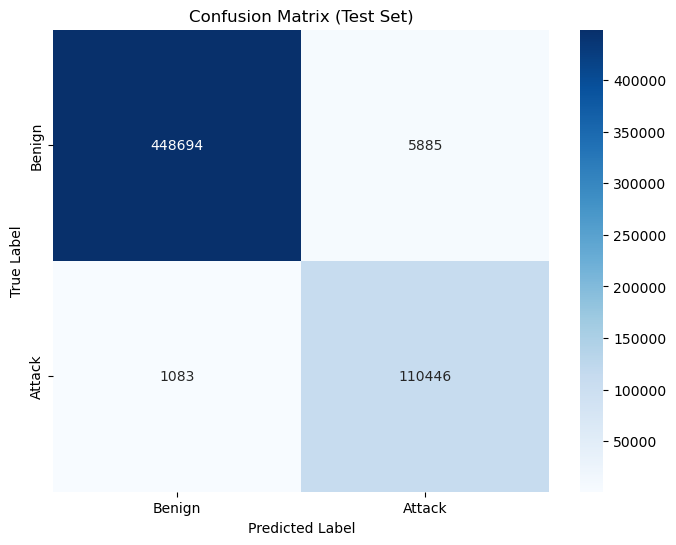

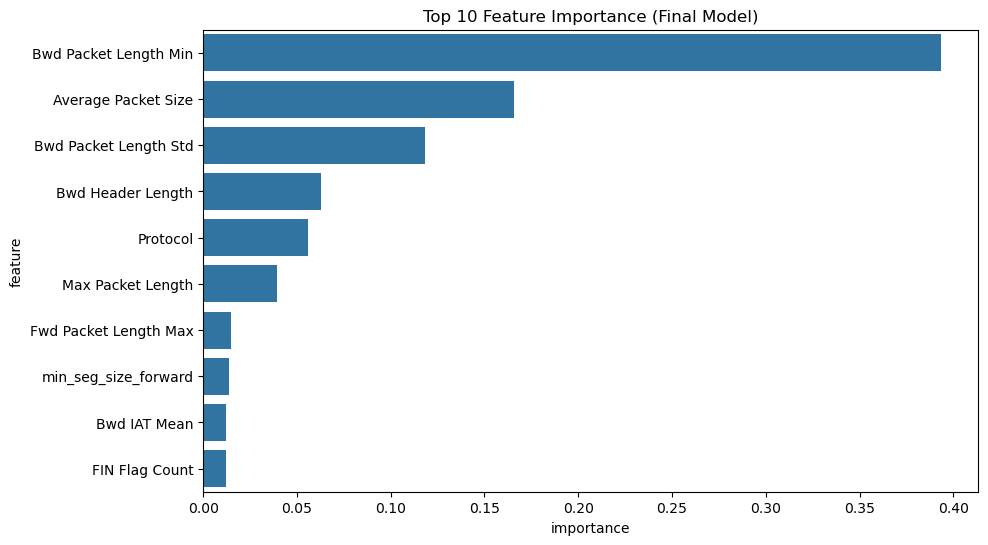

In [15]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import numpy as np

# Drop problematic features
columns_to_drop = ['Source IP', 'Destination IP', 'Source Port', 'Destination Port', 
                   'Init_Win_bytes_forward', 'Init_Win_bytes_backward']
X = combined_df.drop(columns=columns_to_drop + ['Label'], axis=1)
y = combined_df['Label']

# Split the data with original distribution (for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verify class distribution before cross-validation
print("\nClass distribution in full training set (before SMOTE):")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nTest set distribution (original):")
print(pd.Series(y_test).value_counts(normalize=True))

# Initialize StratifiedKFold for cross-validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store metrics for each fold
f1_scores = []
precision_scores = []
recall_scores = []
accuracy_scores = []

# Cross-validation loop
fold = 1
for train_index, val_index in skf.split(X_train, y_train):
    print(f"\nFold {fold}/{n_splits}")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Apply SMOTE to the training fold only
    smote = SMOTE(random_state=42)
    X_train_fold_res, y_train_fold_res = smote.fit_resample(X_train_fold, y_train_fold)

    # Train XGBoost model on the resampled fold
    xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
    xgb_model.fit(X_train_fold_res, y_train_fold_res)

    # Predict on the validation fold
    y_val_pred = xgb_model.predict(X_val_fold)

    # Compute metrics for this fold
    f1 = f1_score(y_val_fold, y_val_pred, average='macro')
    precision = precision_score(y_val_fold, y_val_pred, average='macro')
    recall = recall_score(y_val_fold, y_val_pred, average='macro')
    accuracy = accuracy_score(y_val_fold, y_val_pred)

    # Store metrics
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    accuracy_scores.append(accuracy)

    # Print fold results
    print(f"F1-score (macro): {f1:.4f}")
    print(f"Precision (macro): {precision:.4f}")
    print(f"Recall (macro): {recall:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

    fold += 1

# Print average metrics across all folds
print("\nCross-Validation Results (Mean ± Std):")
print(f"F1-score (macro): {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"Precision (macro): {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Recall (macro): {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")

# Train the final model on the full training set with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Print final test set results
print("\nFinal Test Set Evaluation:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Attack']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Attack'],
            yticklabels=['Benign', 'Attack'])
plt.title('Confusion Matrix (Test Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature Importance
feature_importance = xgb_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importance (Final Model)')
plt.show()